**Applying Machine Learning Algorithm** 


> **Linear Regression**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Used Car Details.csv to Used Car Details.csv


In [ ]:
data = pd.read_csv('Used Car Details.csv')
data

,NAME,YEAR,SELLING PRICE,KM DRIVEN,FUEL,SELLER TYPE,TRANSMISSION,OWNER,MILEAGE,ENGINE,MAX POWER,TORQUE,SEATS
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [ ]:
data['Current_Year'] = 2021

In [ ]:
#Calculating how old the vehicle is?
data['Years_old'] = data['Current_Year'] - data['YEAR']

In [ ]:
data.drop(['YEAR','NAME','Current_Year','MILEAGE','ENGINE','MAX POWER','TORQUE','SEATS'],axis=1,inplace=True)

In [ ]:
data.head(5)

,SELLING PRICE,KM DRIVEN,FUEL,SELLER TYPE,TRANSMISSION,OWNER,Years_old
0,450000,145500,Diesel,Individual,Manual,First Owner,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,15
3,225000,127000,Diesel,Individual,Manual,First Owner,11
4,130000,120000,Petrol,Individual,Manual,First Owner,14


In [ ]:
#Checking null values
data.isna().sum()

SELLING PRICE    0
KM DRIVEN        0
FUEL             0
SELLER TYPE      0
TRANSMISSION     0
OWNER            0
Years_old        0
dtype: int64

In [ ]:
#Dropping null values
data.dropna()

,SELLING PRICE,KM DRIVEN,FUEL,SELLER TYPE,TRANSMISSION,OWNER,Years_old
0,450000,145500,Diesel,Individual,Manual,First Owner,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,15
3,225000,127000,Diesel,Individual,Manual,First Owner,11
4,130000,120000,Petrol,Individual,Manual,First Owner,14
...,...,...,...,...,...,...,...
8123,320000,110000,Petrol,Individual,Manual,First Owner,8
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,14
8125,382000,120000,Diesel,Individual,Manual,First Owner,12
8126,290000,25000,Diesel,Individual,Manual,First Owner,8


In [ ]:
#Dropping Duplicates
data.drop_duplicates()

,SELLING PRICE,KM DRIVEN,FUEL,SELLER TYPE,TRANSMISSION,OWNER,Years_old
0,450000,145500,Diesel,Individual,Manual,First Owner,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,15
3,225000,127000,Diesel,Individual,Manual,First Owner,11
4,130000,120000,Petrol,Individual,Manual,First Owner,14
...,...,...,...,...,...,...,...
8121,260000,50000,Petrol,Individual,Manual,Second Owner,8
8122,475000,80000,Diesel,Individual,Manual,Second Owner,7
8123,320000,110000,Petrol,Individual,Manual,First Owner,8
8124,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,14


**Chart Topology**

**Line Chart**

Text(0, 0.5, 'Years Old')

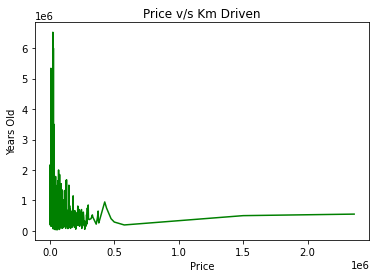

In [ ]:
x = data.groupby('KM DRIVEN').mean()['SELLING PRICE']
y = x.plot(color='green')
y.set_title('Price v/s Km Driven')
y.set_xlabel('Price')
y.set_ylabel('Years Old')

**Bar Chart**

Text(0, 0.5, 'Price')

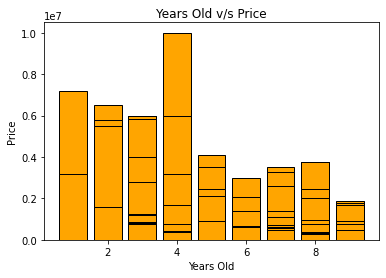

In [ ]:
x = data[data['Years_old']<10]
plt.bar(x['Years_old'],x['SELLING PRICE'],color='orange',edgecolor='black')
plt.title('Years Old v/s Price')
plt.xlabel('Years Old')
plt.ylabel('Price')

**Pie Charts**

Text(0.5, 1.0, 'Fuel Type Ratios')

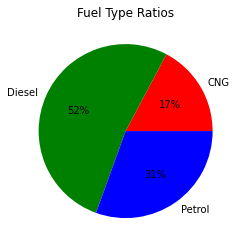

In [ ]:
x = pd.DataFrame(data.groupby(['FUEL']).mean()['SELLING PRICE'])
plt.pie(x['SELLING PRICE'],labels=x.index,colors=['red','green','blue'],autopct='%1.0f%%')
plt.title('Fuel Type Ratios')

Text(0.5, 1.0, 'Transmission Type Ratios')

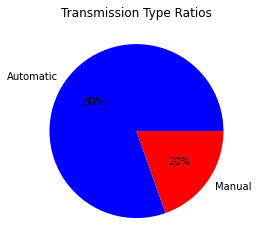

In [ ]:
x = pd.DataFrame(data.groupby(['TRANSMISSION']).mean()['SELLING PRICE'])
plt.pie(x['SELLING PRICE'],labels=x.index,colors=['blue','red'],autopct='%1.0f%%')
plt.title('Transmission Type Ratios')

**Scatter Plot**

Text(0, 0.5, 'Years Old')

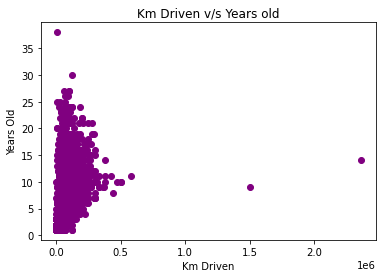

In [ ]:
plt.scatter(data['KM DRIVEN'],data['Years_old'],color='purple')
plt.title('Km Driven v/s Years old')
plt.xlabel('Km Driven')
plt.ylabel('Years Old')

**3-D Charts**

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

**3-D Surface Plot**

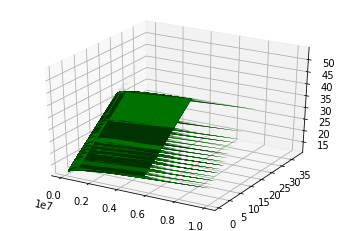

In [ ]:
a = np.array(data['SELLING PRICE'])
b = np.array(data['Years_old'])
a,b = np.meshgrid(a,b)
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.plot_surface(a,b,np.log(a)+b,color='green')

**Multi Panel Plot**

Text(0.5, 1.0, 'Price v/s Km')

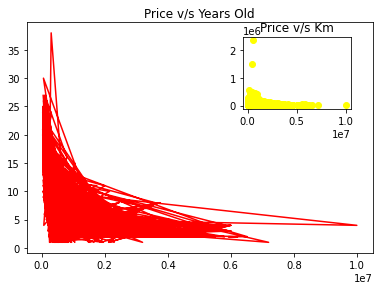

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
inner_ax = fig.add_axes([0.6,0.6,0.25,0.25])
ax.plot(data['SELLING PRICE'],data['Years_old'],color='red')
ax.set_title('Price v/s Years Old')
inner_ax.scatter(data['SELLING PRICE'],data['KM DRIVEN'],color='yellow')
inner_ax.set_title('Price v/s Km')

**One Hot Encoding**

In [ ]:
data_final = pd.get_dummies(data,drop_first=True)

In [ ]:
data_final.head(5)

,SELLING PRICE,KM DRIVEN,Years_old,FUEL_Diesel,FUEL_Petrol,SELLER TYPE_Individual,SELLER TYPE_Trustmark Dealer,TRANSMISSION_Manual,OWNER_Fourth & Above Owner,OWNER_Second Owner,OWNER_Test Drive Car,OWNER_Third Owner
0,450000,145500,7,1,0,1,0,1,0,0,0,0
1,370000,120000,7,1,0,1,0,1,0,1,0,0
2,158000,140000,15,0,1,1,0,1,0,0,0,1
3,225000,127000,11,1,0,1,0,1,0,0,0,0
4,130000,120000,14,0,1,1,0,1,0,0,0,0


In [ ]:
data_final.corr()

,SELLING PRICE,KM DRIVEN,Years_old,FUEL_Diesel,FUEL_Petrol,SELLER TYPE_Individual,SELLER TYPE_Trustmark Dealer,TRANSMISSION_Manual,OWNER_Fourth & Above Owner,OWNER_Second Owner,OWNER_Test Drive Car,OWNER_Third Owner
SELLING PRICE,1.000000,-0.225534,-0.414092,0.206521,-0.195975,-0.386244,0.035084,-0.588845,-0.075669,-0.179881,0.115880,-0.118956
KM DRIVEN,-0.225534,1.000000,0.418006,0.266368,-0.269802,0.204736,-0.084282,0.201229,0.094939,0.209532,-0.024214,0.145634
Years_old,-0.414092,0.418006,1.000000,-0.051762,0.044633,0.246161,-0.102238,0.244707,0.207020,0.311225,-0.031877,0.280220
FUEL_Diesel,0.206521,0.266368,-0.051762,1.000000,-0.976687,-0.000239,-0.137961,0.025519,-0.010638,0.046762,-0.017008,-0.014272
FUEL_Petrol,-0.195975,-0.269802,0.044633,-0.976687,1.000000,-0.008983,0.142335,-0.034631,0.007300,-0.051046,0.017630,0.012820
SELLER TYPE_Individual,-0.386244,0.204736,0.246161,-0.000239,-0.008983,1.000000,-0.385425,0.375234,0.066360,0.165983,-0.055297,0.116236
SELLER TYPE_Trustmark Dealer,0.035084,-0.084282,-0.102238,-0.137961,0.142335,-0.385425,1.000000,-0.149677,-0.025577,-0.047034,-0.004290,-0.046814
TRANSMISSION_Manual,-0.588845,0.201229,0.244707,0.025519,-0.034631,0.375234,-0.149677,1.000000,0.041761,0.119681,-0.049621,0.072274
OWNER_Fourth & Above Owner,-0.075669,0.094939,0.207020,-0.010638,0.007300,0.066360,-0.025577,0.041761,1.000000,-0.087438,-0.003670,-0.040040
OWNER_Second Owner,-0.179881,0.209532,0.311225,0.046762,-0.051046,0.165983,-0.047034,0.119681,-0.087438,1.000000,-0.014667,-0.160041


**Heat Map**

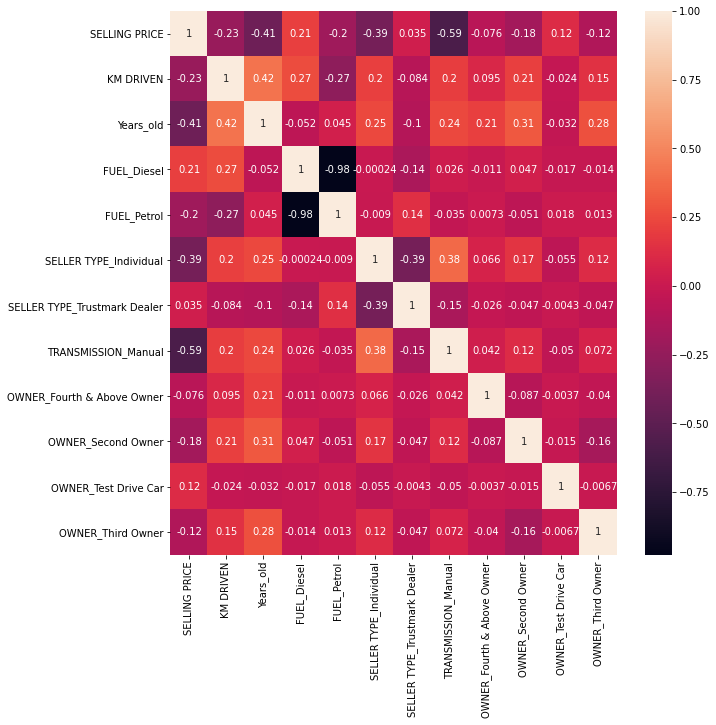

In [ ]:
corr = data_final.corr()
corr_features = corr.index
plt.figure(figsize=(10,10))
g = sns.heatmap(data_final[corr_features].corr(), annot=True)

In [ ]:
x = data_final.corr().sort_values(by="SELLING PRICE", ascending=False)
print(x['SELLING PRICE'])

SELLING PRICE                   1.000000
FUEL_Diesel                     0.206521
OWNER_Test Drive Car            0.115880
SELLER TYPE_Trustmark Dealer    0.035084
OWNER_Fourth & Above Owner     -0.075669
OWNER_Third Owner              -0.118956
OWNER_Second Owner             -0.179881
FUEL_Petrol                    -0.195975
KM DRIVEN                      -0.225534
SELLER TYPE_Individual         -0.386244
Years_old                      -0.414092
TRANSMISSION_Manual            -0.588845
Name: SELLING PRICE, dtype: float64


**Training and Testing the Dataset**

In [ ]:
X = data_final.iloc[:,1:]
y = data_final.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 8033 to 4893
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   KM DRIVEN                     1626 non-null   int64
 1   Years_old                     1626 non-null   int64
 2   FUEL_Diesel                   1626 non-null   uint8
 3   FUEL_Petrol                   1626 non-null   uint8
 4   SELLER TYPE_Individual        1626 non-null   uint8
 5   SELLER TYPE_Trustmark Dealer  1626 non-null   uint8
 6   TRANSMISSION_Manual           1626 non-null   uint8
 7   OWNER_Fourth & Above Owner    1626 non-null   uint8
 8   OWNER_Second Owner            1626 non-null   uint8
 9   OWNER_Test Drive Car          1626 non-null   uint8
 10  OWNER_Third Owner             1626 non-null   uint8
dtypes: int64(2), uint8(9)
memory usage: 52.4 KB


In [ ]:
print(X_train,"\n\n\n\n",X_test,"\n\n\n\n",y_train,"\n\n\n\n",y_test)

      KM DRIVEN  Years_old  ...  OWNER_Test Drive Car  OWNER_Third Owner
7395      92686          9  ...                     0                  0
4018      40000         12  ...                     0                  0
2162      48000          9  ...                     0                  0
46        10300          3  ...                     0                  0
941      160000         14  ...                     0                  0
...         ...        ...  ...                   ...                ...
962      219000         13  ...                     0                  0
1189     106000          7  ...                     0                  0
390      162000          9  ...                     0                  1
2872     120000         11  ...                     0                  0
2472      70000          6  ...                     0                  0

[6502 rows x 11 columns] 



       KM DRIVEN  Years_old  ...  OWNER_Test Drive Car  OWNER_Third Owner
8033     200000     

**Applying Linear Regression Algorithm**

In [ ]:
from sklearn import linear_model
linreg = linear_model.LinearRegression()
linreg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linreg.intercept_

2214262.552607707

In [ ]:
linreg.coef_

array([-8.77771491e-01, -4.39161396e+04,  2.82153021e+05, -6.26981199e+04,
       -3.74547907e+05, -4.86384139e+05, -1.13367584e+06,  2.52775886e+04,
       -4.86304951e+04,  2.51067581e+06,  2.26601539e+03])

In [ ]:
score = linreg.score(X_train,y_train)
score

0.49785704263703856

**Predicting Results**

In [ ]:
predict = linreg.predict(X_train)
result = y_train - predict
print(result)

7395   -497506.855676
4018    113763.846735
2162     46037.599766
46     -487099.129839
941      95708.059231
            ...      
962     128580.437568
1189   -189104.578708
390    -188013.606456
2872   -226151.219305
2472    461749.012865
Name: SELLING PRICE, Length: 6502, dtype: float64


**Linear Regression Graph**

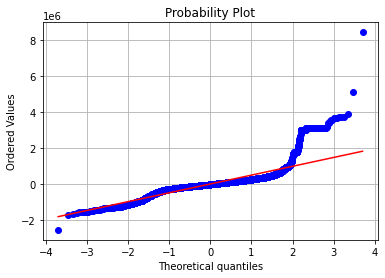

In [ ]:
from scipy import stats
stats.probplot(result,plot=plt)
plt.grid()
plt.show()

**Scatter Plot**

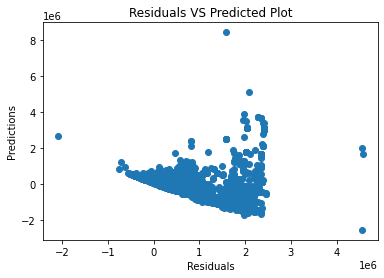

In [ ]:
plt.scatter(predict,result)
plt.title("Residuals VS Predicted Plot")
plt.xlabel('Residuals')
plt.ylabel('Predictions')
plt.show()

**Histogram**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


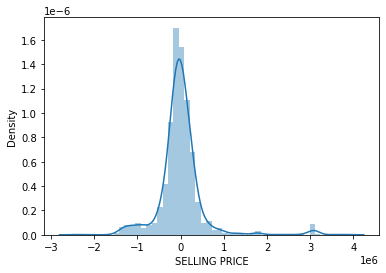

In [ ]:
plot = linreg.predict(X_test)
sns.distplot(y_test - plot)